# Project Bank Churn
#### SGH - Data Mining 2023

###  1. About Dataset:</br>
A dataset which contain some customers who are withdrawing their account from the bank due to some loss and other issues with the help this data we try to analyse and maintain accuracy. </br></br>
This dataset consists of 10000 entries (10000 customers) and 14 columns.</br>
There are 3 categorical columns and 11 numerical columns</br>

You can find this dataset below the link:</br>
https://www.kaggle.com/datasets/santoshd3/bank-customers

#### Main purpose of the project:</br>
To make predictions based on training results. This can bring solution to customers rejection, help with greater retention, as well as help understand why particular people leave. </br>
A secondary goal of the project will also be a performance comarision of different models</br>
Decision Trees,</br> Random Forest,</br> ANN.</br></br>
Project is done in CRISP-DM metodology


#### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

#### load ML libraries

In [2]:
#conda install tensorflow
#conda install -c anaconda absl-py

In [2]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,recall_score
from sklearn.model_selection import train_test_split
#importing models
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense

In [3]:
import random as rn
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

### 2. Exploratory data analysis
Import Dataset

In [4]:
df=pd.read_csv("C:/Users/msoln/Desktop/bank_churn.csv")
data=df.copy()
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Label Description
RowNumber -- Unique Identifier for each record in the data.</br>
CustomerId -- Unique ID given to each customer.</br>
Surname -- Its the Surname of customer.</br>
CreditScore -- Credit Score of the customers which ranges between 350 and 850 on scale of 0 to 1000.</br>
Geography -- Country to which the customers belongs.</br>
Gender -- Gender of customer.</br>
Age -- Age of customer.</br>
Tenure -- Number of years the customer has been a part of the Bank.</br>
Balance -- The balance amount that is remaining in customer's bank account.</br>
NumOfProducts -- Number of products the customers has bought from bank i.e like policy, loan etc.</br>
HasCrCard -- This tells whether the customer has Credit Card of the bank or not represented in form of binary data.</br>
IsActiveMember -- Is the customer an active member of bank or not represented in form of binary data.</br>
ExtimatedSalary -- Estimated Salary of the customer.</br>
Exited [LABEL] -- This is the final prediction label that tells whether the customer has exited the bank i.e closed the bank account in their bank or not in form of binary data form.

#### Remove unnecesary columns

In [5]:
data=data.drop(['CustomerId','Surname','RowNumber'],axis=1)
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

 we can drop these columns, they have no value for predicting

#### Rename traget variable 

In [6]:
data.rename(columns = {'Exited':'IsChurn'}, inplace = True)

In [7]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,IsChurn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Check for null values, data quality

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  IsChurn          10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


there are 3 types of variables:</br> object</br>int</br> float</br>

##### Check if missing values

In [9]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
IsChurn            0
dtype: int64

There are no missing values

In [10]:
round(data.describe(),2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,IsChurn
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


Average salary is about 100090</br>
Avg age is 39 years old and 5 years tenure

In [11]:
data.describe(include = 'object')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


Most common Geography is France,</br>
There are 5457 males in data set </br>

In [12]:
data.groupby(['Gender']).mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,IsChurn
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


-Females have more tendency to Churn than Males</br>
-Males have bigger balance and Salary</br>
-Males have more Credit Cards and more products related to account</br>

### Histograms

In [13]:
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

ValueError: num must be 1 <= num <= 4, not 5

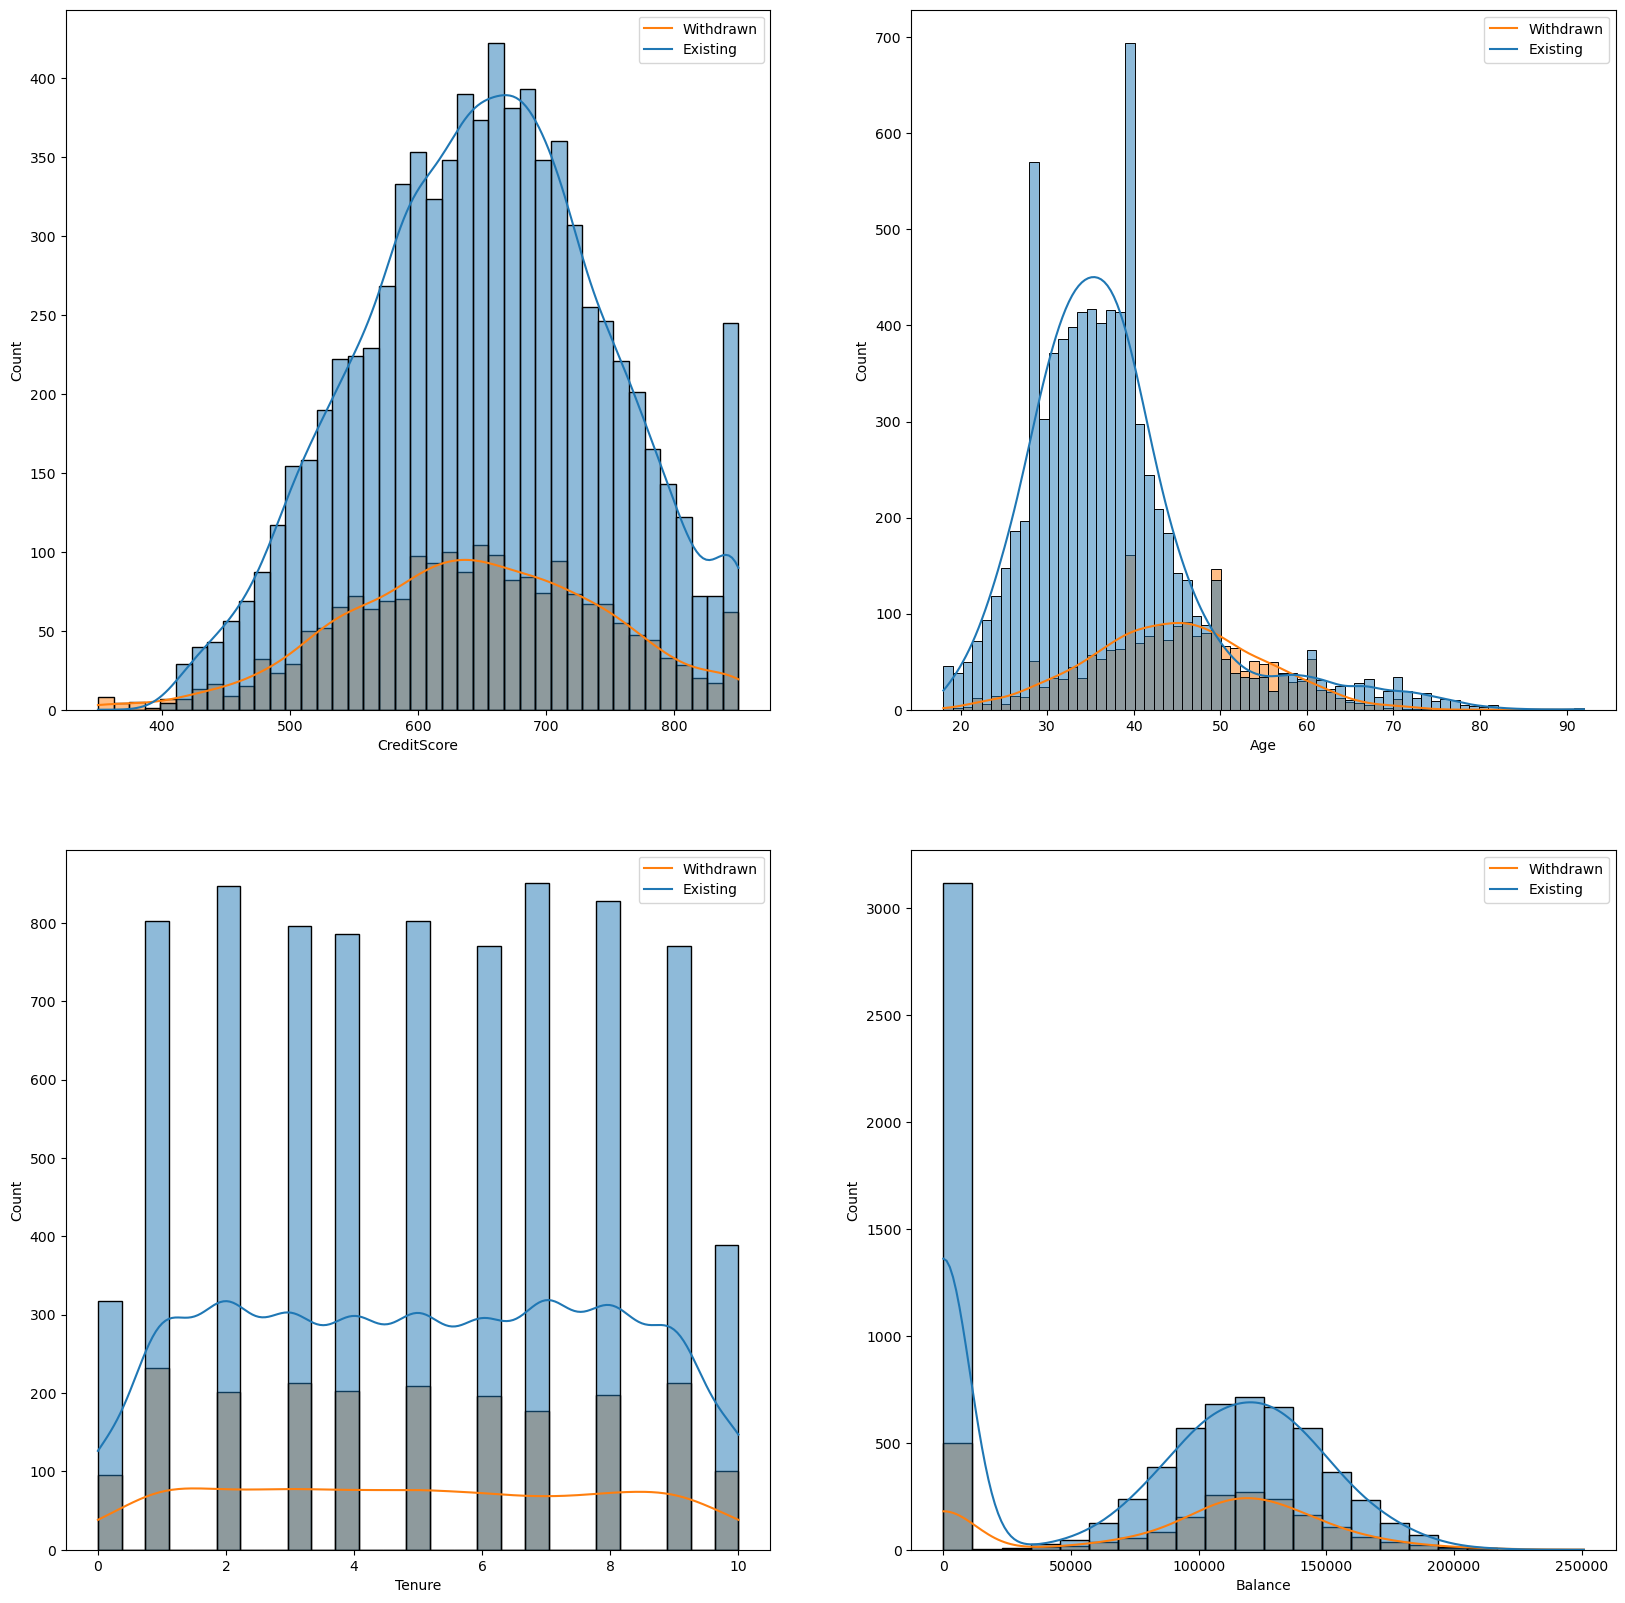

In [19]:
plt.figure(figsize=(20,20))
for idx, col in enumerate(num_cols):
    plt.subplot(2,2,idx + 1)
    ax = sns.histplot(data = data, x = col, kde = True, hue =data.IsChurn);
    #ax.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2, label = 'Mean')
    #ax.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=2, label = 'Median')
    ax.legend(labels = ['Withdrawn','Existing' ], loc = 'upper right')


plt.figure(figsize=(10,10))
for idx,col in enumerate(num_cols):
    plt.subplot(2,2,idx+1)
    ax = sns.histplot(data = data, x = col, kde = True, hue =data.IsChurn);
    ax.legend(labels = ['Existing', 'Withdrawn'], loc = 'upper right')
    

### Barplots

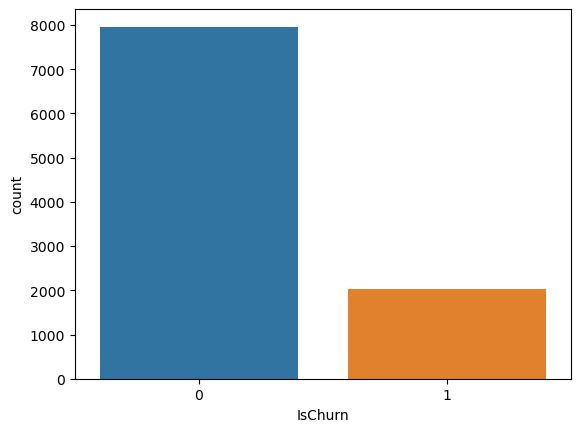

In [14]:
ax = sns.countplot(data = data, x = data.IsChurn)
plt.show()

20% of datasets are churns

#### Barplot for categorical variables

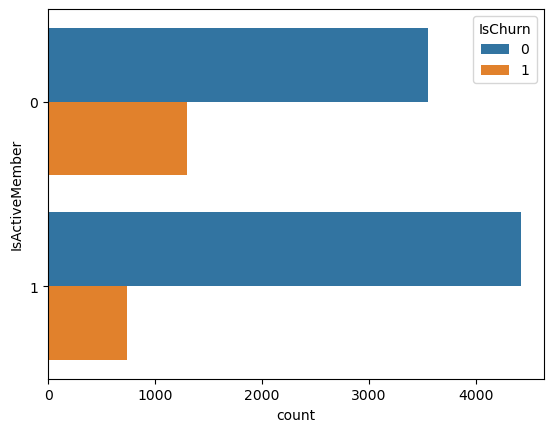

In [15]:
cat_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
ax = sns.countplot(data = data, y = data["IsActiveMember"], hue = data['IsChurn'])

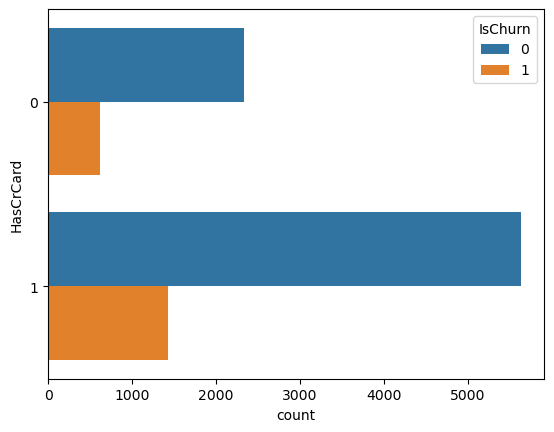

In [16]:
ax = sns.countplot(data = data, y = data["HasCrCard"], hue = data['IsChurn'])

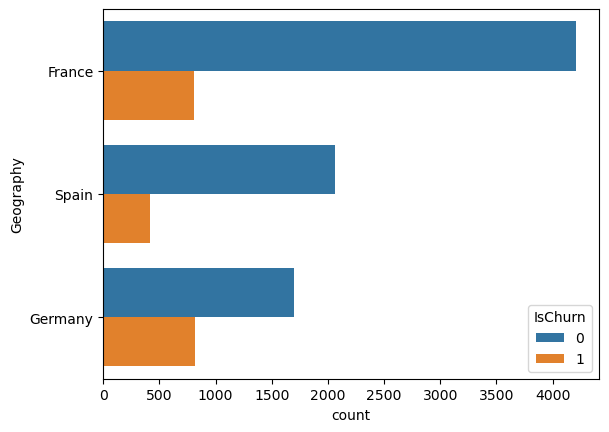

In [17]:
ax = sns.countplot(data = data, y = data["Geography"], hue = data['IsChurn'])

Not active customers tends to Churn more

### BOXPLOTS to see outliers

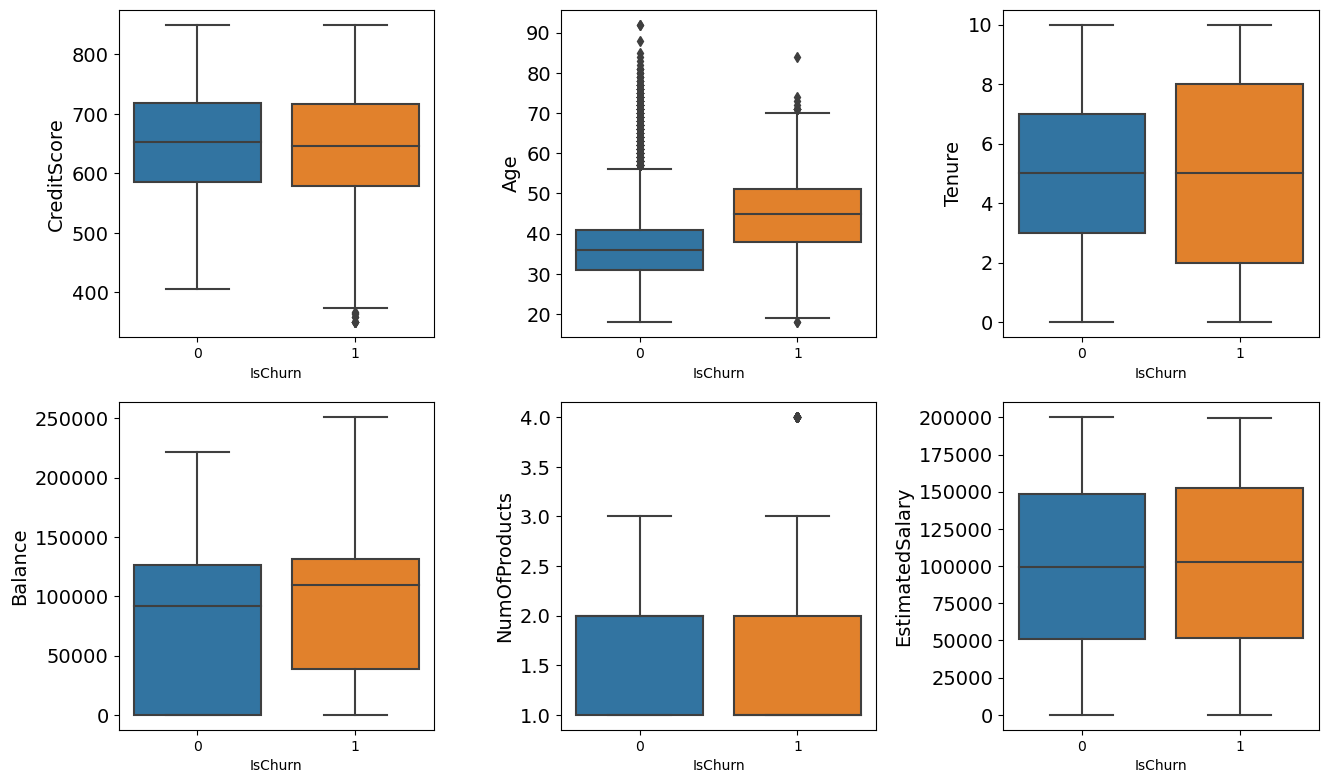

In [18]:
plt.figure(figsize = (15, 9))
for idx, col in enumerate(num_cols):
    plt.subplot(2, 3, idx + 1)
    ax = sns.boxplot(data = data, y = data[col], x = data.IsChurn)
    plt.ylabel(col, fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.2)

#### Observations </br>
People around 45 are more likely to leave the bank than people around 35</br>
• There was no significant difference in the annual amount of revenue and the decision to leave
bank.</br>
• The creditworthiness of people who stayed with the Bank is slightly better than those who
who resigned.</br>
• Balance of funds on the Bank's customers' account, what is left in it is slightly lower, from
people who left the Bank.</br>
Analyzing chart 6, it can be concluded that there is no need to remove outliers,
because there are no such values in the dataset. No outliers
allows you to focus on other aspects of the analysis.</br>
It is also worth pointing out that further analysis is needed on the part of the Bank to understand
reasons for the problem why customers with higher funds resign from the Bank's services.
The graph may suggest that there is a relationship between having more funds and
customer churn, but it does not provide direct evidence of causation

## Data preparation


#### Categorial variables encoding

In [20]:
df_cat = data.select_dtypes('object')
# One hot encoding
data = pd.get_dummies(data, df_cat.columns, drop_first = True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,IsChurn,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


There are 3 new columns: Geography_Spain, Geography_Germany and Gender_Male

### Corelation matrix

In [21]:
matrix = data.corr()
matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,IsChurn,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
IsChurn,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


 More visual solution

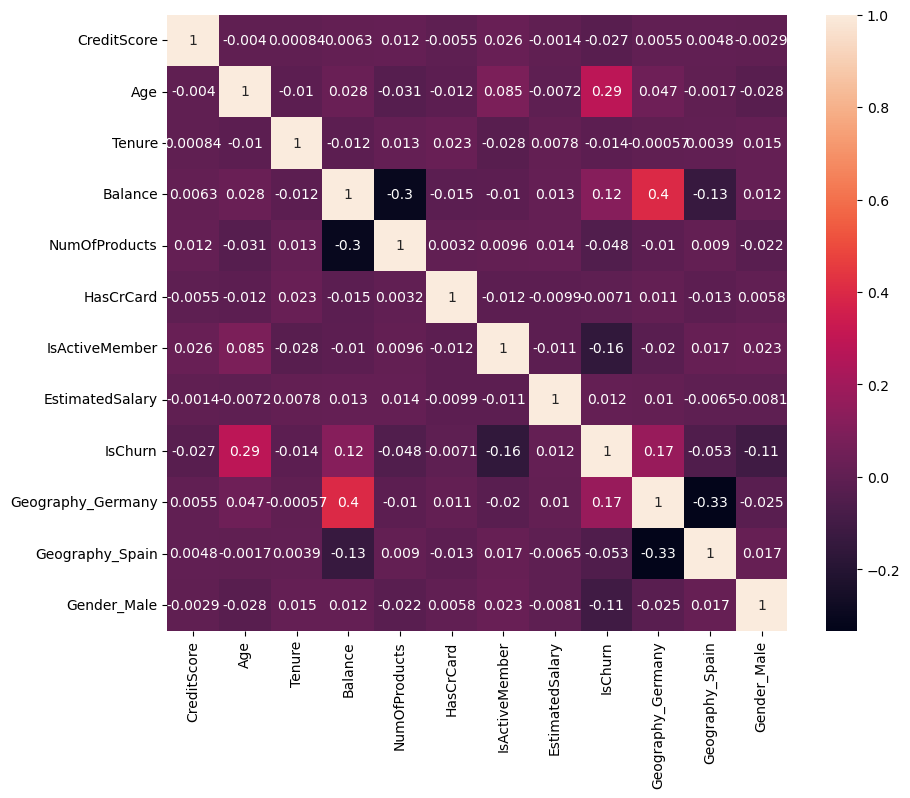

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

#### Observations </br>
-Age and Churn are 0.29 </br>
-Balance and geography German is 0.4</br>
-Number of products and balance is -0.3

### Variable importance

In [23]:
x_features = data.drop(['IsChurn','Geography_Spain','Geography_Germany','Gender_Male'],axis=1).values
y=data['IsChurn'].values

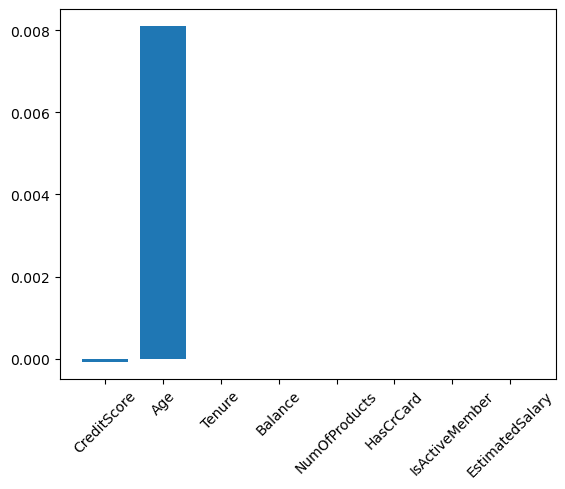

In [24]:
lasso=Lasso(alpha=0.3)
lasso.fit(x_features,y)
lasso_coef = lasso.coef_
#print(lasso_coef)
names=data.drop(['IsChurn','Geography_Spain','Geography_Germany','Gender_Male'],axis=1).columns
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

Lasso regression was used to choce the feature, most predicting variable

## 4. Data Modeling
### Machine Learning models
spliting datasets for train and test groups using train_test_split function from sklearn

In [25]:
X=data.drop(["IsChurn"],axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=21, stratify=y)

Test group size is 25%

#### Standard scaler

In [26]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [27]:
X_train_scaled.shape[1]

11

Feature Scaling is the most important part of data preprocessing. If we see our dataset then some attribute contains information in Numeric value some value very high and some are very low if we see the age and estimated salary. This will cause some issues in our machinery model to solve that problem we set all values on the same scale there are two methods to solve that problem first one is Normalize and Second is Standard Scaler.

### ANN 

In [28]:
ann=tf.keras.models.Sequential()
ann

In [29]:
ann.add(Dense(3,input_dim=X_train_scaled.shape[1],activation="relu"))
#Output Layer
ann.add(Dense(1,activation="sigmoid"))

In [30]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
ann.fit(X_train_scaled,y_train,batch_size=32,epochs=50)

Epoch 1/50
235/235 [==============================] - 2s 4ms/step - loss: 0.8266 - accuracy: 0.5477
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.5833 - accuracy: 0.7361
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.5050 - accuracy: 0.7843
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.4731 - accuracy: 0.8048
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.4534 - accuracy: 0.8127
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.4383 - accuracy: 0.8212
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.4251 - accuracy: 0.8307
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.4136 - accuracy: 0.8343
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.4035 - accuracy: 0.8395
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3946 - accuracy: 0.8411

In [32]:
ann_pred=ann.predict(X_test_scaled)
## 
New_ann_pred=[]
for x in ann_pred:
    if x>=0.5:
        New_ann_pred.append(1)
    else:
        New_ann_pred.append(0)

79/79 [==============================] - 0s 3ms/step


In [33]:
score_sieci=ann.evaluate(X_train_scaled,y_train)
score_sieci[1]

235/235 [==============================] - 1s 3ms/step - loss: 0.3465 - accuracy: 0.8604


0.8604000210762024

In [34]:
score_sieci1=ann.evaluate(X_test_scaled,y_test)
score_sieci1[1]

79/79 [==============================] - 0s 3ms/step - loss: 0.3392 - accuracy: 0.8644


0.8644000291824341

### Decision Trees
we will use x_train insted of X_train_scaled, because decision tree and all trees algorithm do not require scaling 

In [35]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
y_pred_clf = clf.predict(X_test)

### Random forest
initialize random Forest Classifier 

In [37]:
rfc = RandomForestClassifier(random_state=42)  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
rfc.fit(X_train, y_train)
# performing predictions on the test dataset
y_pred_rfc = rfc.predict(X_test)

## Accuracy Scores

In [38]:
model_name=['decision tree','random forest','ann_model']
acc=[accuracy_score(y_test,y_pred_clf),
     accuracy_score(y_test,y_pred_rfc)
     ,accuracy_score(y_test,New_ann_pred)]
#data frame from two lists
df1=pd.DataFrame(list(zip(model_name,acc)),columns=['model_name','accuracy score'])
print(df1)

      model_name  accuracy score
0  decision tree          0.8076
1  random forest          0.8748
2      ann_model          0.8644


In [39]:
model_name=['decision tree','random forest','ann_model']
acc=[accuracy_score(y_test,y_pred_clf),
     accuracy_score(y_test,y_pred_rfc)
     ,accuracy_score(y_test,New_ann_pred)]
rec=[recall_score(y_test,y_pred_clf),
     recall_score(y_test,y_pred_rfc)
     ,recall_score(y_test,New_ann_pred)]
f1=[f1_score(y_test,y_pred_clf),
     f1_score(y_test,y_pred_rfc)
     ,f1_score(y_test,New_ann_pred)]
#data frame from two lists
df2=pd.DataFrame(list(zip(model_name,acc,rec,f1)),columns=['model_name','accuracy_score','recall',"f1-score"])

In [40]:
df2.sort_values(['f1-score'], ascending = False)

,model_name,accuracy_score,recall,f1-score
1,random forest,0.8748,0.516699,0.626937
2,ann_model,0.8644,0.471513,0.586081
0,decision tree,0.8076,0.516699,0.522344


## Hyperparameter Tuning

#### GridSearch Tree

In [41]:
tree_param = {"ccp_alpha":[0.0001,0.001,0.01,1]}

In [42]:
gsc = GridSearchCV(
    estimator=clf,
    param_grid=tree_param,
    cv=5,
    n_jobs=5
)

In [43]:
gsc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=5,
             param_grid={'ccp_alpha': [0.0001, 0.001, 0.01, 1]})

In [44]:
gsc.best_params_

{'ccp_alpha': 0.001}

In [45]:
clf1=DecisionTreeClassifier(random_state=42,ccp_alpha=0.001)
clf1.fit(X_train, y_train)
y_pred_clf_opt = clf1.predict(X_test)

### hypertuning random_forest

In [46]:
param = {
    'n_estimators': [10,50,100,200,400]
}
gsc_r = GridSearchCV(
    estimator=rfc,
    param_grid=param,
    cv=5,
    n_jobs=5,
    verbose=1
)

In [47]:
gsc_r.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=5,
             param_grid={'n_estimators': [10, 50, 100, 200, 400]}, verbose=1)

In [48]:
gsc_r.best_params_

{'n_estimators': 200}

Grid Search metod has showed that 120 is optimal number, so let's initialize random forest with that number

In [80]:
rfc2 = RandomForestClassifier(random_state=1,n_estimators=200)  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
rfc2.fit(X_train, y_train)
# performing predictions on the test dataset
y_pred_rfc_opt = rfc2.predict(X_test)
y_prob_rfc_opt=rfc2.predict_proba(X_test)[::,1]

###  5. Evaluation

In [50]:
model_name=['decision tree','hypertuned decision tree ','random forest','hypertuned random forest','ann_model']
acc=[accuracy_score(y_test,y_pred_clf),accuracy_score(y_test,y_pred_clf_opt),
     accuracy_score(y_test,y_pred_rfc),accuracy_score(y_test,y_pred_rfc_opt)
     ,accuracy_score(y_test,New_ann_pred)]
#data frame from two lists
df1=pd.DataFrame(list(zip(model_name,acc)),columns=['model_name','accuracy score'])
print(df1)

                  model_name  accuracy score
0              decision tree          0.8076
1  hypertuned decision tree           0.8644
2              random forest          0.8748
3   hypertuned random forest          0.8740
4                  ann_model          0.8644


In [51]:
model_name=['hyper_decision tree','hyper_random forest','ann_model']
acc=[accuracy_score(y_test,y_pred_clf_opt),
     accuracy_score(y_test,y_pred_rfc_opt)
     ,accuracy_score(y_test,New_ann_pred)]
rec=[recall_score(y_test,y_pred_clf_opt),
     recall_score(y_test,y_pred_rfc_opt)
     ,recall_score(y_test,New_ann_pred)]
f1=[f1_score(y_test,y_pred_clf_opt),
     f1_score(y_test,y_pred_rfc_opt)
     ,f1_score(y_test,New_ann_pred)]
#data frame from two lists
df3=pd.DataFrame(list(zip(model_name,acc,rec,f1)),columns=['model_name','accuracy_score','recall',"f1-score"])

In [52]:
df3.sort_values(['f1-score'], ascending = False)

,model_name,accuracy_score,recall,f1-score
1,hyper_random forest,0.8740,0.516699,0.625446
0,hyper_decision tree,0.8644,0.497053,0.598817
2,ann_model,0.8644,0.471513,0.586081


### Confusion matrix

In [59]:
print('decision tree conf matrix')
print(confusion_matrix(y_test,y_pred_clf))
print('random forest conf matrix')
print(confusion_matrix(y_test,y_pred_rfc))
print('ANN model conf matrix')
print(confusion_matrix(y_test,New_ann_pred))

decision tree conf matrix
[[1756  235]
 [ 246  263]]
random forest conf matrix
[[1924   67]
 [ 246  263]]
ANN model conf matrix
[[1921   70]
 [ 269  240]]


### Model scores

In [60]:
print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1991
           1       0.53      0.52      0.52       509

    accuracy                           0.81      2500
   macro avg       0.70      0.70      0.70      2500
weighted avg       0.81      0.81      0.81      2500



In [61]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.97      0.92      1991
           1       0.80      0.52      0.63       509

    accuracy                           0.87      2500
   macro avg       0.84      0.74      0.78      2500
weighted avg       0.87      0.87      0.86      2500



In [62]:
print(classification_report(y_test,New_ann_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1991
           1       0.77      0.47      0.59       509

    accuracy                           0.86      2500
   macro avg       0.83      0.72      0.75      2500
weighted avg       0.86      0.86      0.85      2500



### Model Score Comparision

In [63]:
#ploting scores
sns.barplot(x = "model_name", y = "score", data=df1)
plt.ylabel("Accuracy score")
plt.xlabel("Model name")

ValueError: Could not interpret input 'score'

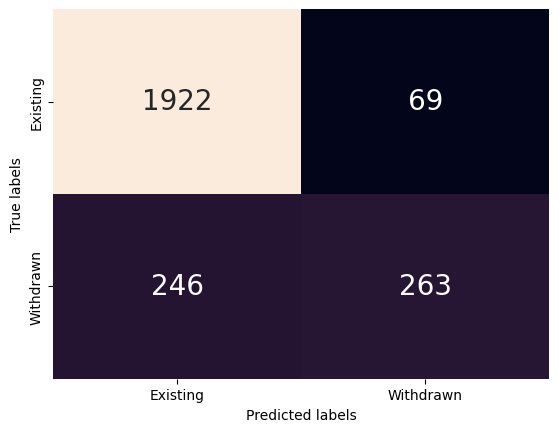

In [66]:
#hyper Random Forest
conf_mat = confusion_matrix(y_test, y_pred_rfc_opt)
ax = sns.heatmap(conf_mat, cbar = False, fmt = 'g', annot = True, annot_kws={"size":20})
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Existing', 'Withdrawn'])
ax.yaxis.set_ticklabels(['Existing', 'Withdrawn'])
plt.show()

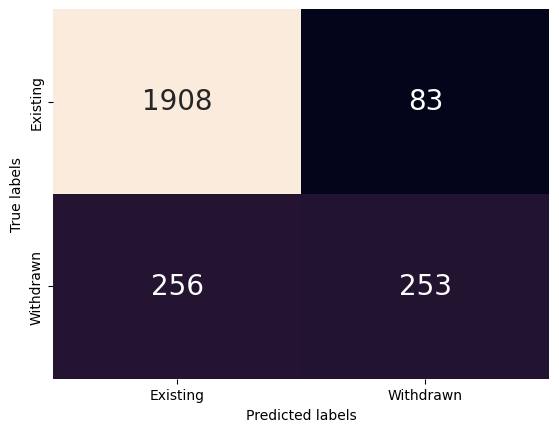

In [67]:
#hyper decision tree
conf_mat = confusion_matrix(y_test, y_pred_clf_opt)
ax = sns.heatmap(conf_mat, cbar = False, fmt = 'g', annot = True, annot_kws={"size":20})
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Existing', 'Withdrawn'])
ax.yaxis.set_ticklabels(['Existing', 'Withdrawn'])
plt.show()

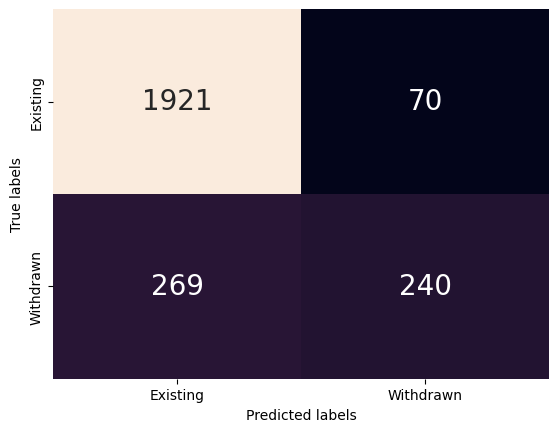

In [68]:
#artifical neutral network
conf_mat = confusion_matrix(y_test, New_ann_pred)
ax = sns.heatmap(conf_mat, cbar = False, fmt = 'g', annot = True, annot_kws={"size":20})
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Existing', 'Withdrawn'])
ax.yaxis.set_ticklabels(['Existing', 'Withdrawn'])
plt.show()

### ROC_AUC

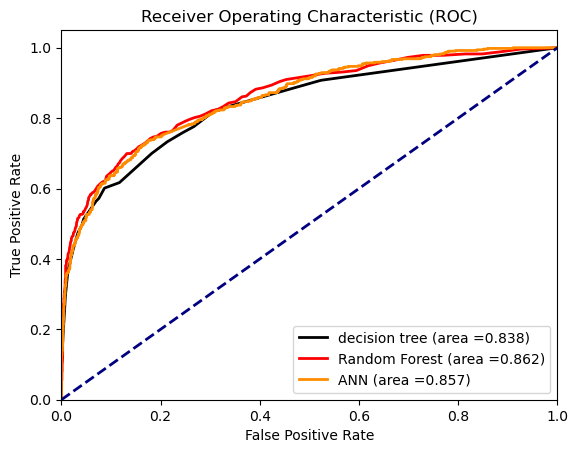

In [90]:
from sklearn import metrics
#predict probabilities
y_prob_rfc_opt=rfc2.predict_proba(X_test)[::,1]
y_prob_clf_opt=clf1.predict_proba(X_test)[::,1]
#metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,ann_pred)
roc_auc = metrics.auc(fpr, tpr)
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test,y_prob_rfc_opt)
roc_auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test,y_prob_clf_opt)
roc_auc2 = metrics.auc(fpr2, tpr2)
#plot
plt.plot(fpr2,tpr2,lw=2,color="black",label="decision tree (area =%0.3f)"%roc_auc2)
plt.plot(fpr1,tpr1,lw=2,color="red",label="Random Forest (area =%0.3f)"%roc_auc1)
plt.plot(fpr,tpr,lw=2,color="darkorange",label="ANN (area =%0.3f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

##  6. Conclusions

The results indicate that the Random Forest achieved the highest ROC score of 0.862, meaning
that it has a better ability to discriminate between positive and negative classes in comparison
to other models. The Decision Tree achieved an ROC score of 0.838, slightly lower
the ability to discriminate between classes compared to the Random Forest. This is in line with
previous observations that the Decision Tree underperformed in the matrix
mistakes and F1-score. The Artificial Neural Network achieved a ROC score similar to Forest
Random, approximately 0.860.</br></br>
In conclusion, the plot of the ROC Curve confirms the results of previous analyzes that Forest
Random is the best model among those tested, having the highest ability to
distinguish between positive and negative class. However, it is important to consider others
factors such as interpretability, computation time and resources when choosing the final one
model

### More Details
As part of this project, an analysis of data on the bank's customers was carried out
they are withdrawing their accounts due to various issues. The goal of the project was understanding
factors influencing customer churn and creating predictive models that
can help predict such cases.
31
Initially, a business understanding was carried out, identifying issues related to
the departure of bank customers. Then, the analysis of the available dataset was started and
preparing it for modelling. Three different learning algorithms were used
machine: decision trees, random forests and artificial neural networks. The models stayed
trained on training data and then evaluated for performance at
using various metrics such as precision, sensitivity and f1-score.
Analysis of the model results showed that the random forest achieved the best performance in
forecasting customer churn, achieving a result of 0.862 of the ROC curve.
Based on the results of the analysis, conclusions can be drawn about the influencing factors
to the departure of the bank's customers and propose solutions aimed at retention
customers. Implementation of customer retention strategies based on the results of the analysis can
contribute to improving customer relations and increasing their loyalty.
The conclusions of this project are important for banks and other financial institutions,
that try to understand and predict the behavior of their customers. Usage
CRISP-DM methodology in this project provided a structured and systematic process
data analysis, which made it possible to achieve the intended business goals